### Import Libs
**DO NOT `RUN ALL` ON THIS SHEET**

In [160]:
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Ingest data and unpack key dataframes

In [158]:
# #                            **********DO NOT UNBLOCK THIS CODE SECTION**********
# #VERSION 1.0 with incorrect owner payout values
# #owner elasticity spreadsheet comes from running draft Jupyter notebook
# df = pd.read_csv('owner_elasticity_10_28.csv').sort_values('OWNER_KEY').reset_index()
# df = df.rename(columns = {'OWNER_KEY': 'Owner Key'})
# df = df.drop('index', axis = 1)
# #                            **********DO NOT UNBLOCK THIS CODE SECTION**********


#owner elasticity spreadsheet comes from running draft Jupyter notebook
df = pd.read_csv('owner_elasticity_11_04.csv').sort_values('OWNER_KEY').reset_index()
df = df.rename(columns = {'OWNER_KEY': 'Owner Key'})
df = df.drop('index', axis = 1)



#                            **********DO NOT UNBLOCK THIS CODE SECTION**********
#VERSION 1.0 with incorrect elasticity formula **LEAVE BLOCK COMMENTED OUT ENTIRELY
#These both come from running elasticity loop at bottom. df_new shows all elasticities across completed services,
#while df_mean calculates average elasticity
# df_new = pd.read_csv('df_new_10_30_run')
# df_mean = pd.read_csv('df_mean_10_30_run')


#VERSION 2.0 with updated formula but iaccurate owner payout
# df_new = pd.read_csv('df_new_10_31_run')
# df_mean = pd.read_csv('df_mean_10_31_run')
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********

#These both come from running elasticity loop at bottom. df_new shows all elasticities across completed services,
df_new = pd.read_csv('df_new_11_04_run')
df_mean = pd.read_csv('df_mean_11_04_run')


#Version 2.0 with S&B filter removed per Jessy request
df_filtered_owners = pd.read_csv('five_plus_walks_v2.csv').sort_values('OWNER_KEY').reset_index()
df_filtered_owners = df_filtered_owners.drop('index', axis = 1)
df_filtered_owners['is_in_filtering_logic'] = True
df_filtered_owners = df_filtered_owners.rename(columns = {'OWNER_KEY': 'Owner Key'})

#                            **********DO NOT UNBLOCK THIS CODE SECTION**********
#OLD VERSION See my Snowflake instance for query logic to pull this CSV. 
# df_filtered_owners = pd.read_csv('five_plus_walks_with_zero_to_one_sb.csv').sort_values('OWNER_KEY').reset_index()
# df_filtered_owners = df_filtered_owners.drop('index', axis = 1)
# df_filtered_owners = df_filtered_owners.rename(columns = {'OWNER_KEY': 'Owner Key'})
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********

#Preview one dataset
df.head(10)

,Owner Key,OWNER_PAYOUT,COMPLETED_WALKS
0,100281,20.0,1
1,100294,20.0,6
2,100294,10.0,9
3,100294,15.0,1
4,100306,22.0,6
5,100306,20.0,1
6,100306,26.0,1
7,100306,24.0,1
8,100313,36.0,6
9,100313,27.6,1


In [178]:
df_mean[df_mean['Owner Key'] == 100294].head()

,Average Elasticity,Owner Key
0,-1.389,100294


In [159]:
#This shows all elasticities across walks for owners
df_new.head()

,Elasticity,Weight,Owner Key
0,-1.000,6,100294
1,-1.778,9,100294
2,9.167,6,100306
3,-0.000,1,100306
4,0.000,1,100306


In [161]:
#This shows average elasticity across walks for each owner
df_mean.head(100)

,Average Elasticity,Owner Key
0,-1.389000,100294
1,3.055667,100306
2,1.190333,100313
3,-0.782667,100358
4,-4.815000,100364
5,-2.853333,100378
6,-10.330750,100393
7,-49.707143,100402
8,25.788400,100409
9,3.526000,100413


### Exploratory Data Analysis
Economic theory stipulates that negative price elasticity corresponds with a consumer following the conventional laws of demand (increased price leads to decreased consumption). A positive elasticity value implies that the consumer treats the good as a luxury (increased price leads to increased consumptions. ([source](https://investinganswers.com/dictionary/p/price-elasticity-demand-ped)) 

I now just want to confirm these elasticities tell us something useful from cherry picking a couple individuals with extreme elasticity values.

In [163]:
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********
#VERSION 1.0 with incorrect elasticity formula **LEAVE BLOCK COMMENTED OUT ENTIRELY
#Investigating someone with super low negative price elasticity (-14.59, key = 100918)
# df[df['OWNER_KEY'] == 100918].head(20)


#VERSION 2.0 with incorrect payout values. 
#Investigating someone with super low negative price elasticity (-31.00, key = 1001954)
# df[df['OWNER_KEY'] == 1001954].head(20)
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********

#Investigating someone with super low negative price elasticity (-88.73, key = 100491)
df[df['Owner Key'] == 100491].head(20)

,Owner Key,OWNER_PAYOUT,COMPLETED_WALKS
96,100491,20.0,1
97,100491,16.8,60
98,100491,14.0,4
99,100491,24.0,17
100,100491,18.2,2


Seems to indicate super responsive to price decreases (completes more services). Let me a look at a couple more very negative values to confirm

In [165]:
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********
#VERSION 1.0 with incorrect elasticity formula **LEAVE BLOCK COMMENTED OUT ENTIRELY
#Investigating someone with super low negative price elasticity (-91.667, key = 100402)
# df[df['OWNER_KEY'] == 100402].head(20)
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********


#VERSION 2.0 with incorrect payout values. 
#Investigating someone with super low negative price elasticity (-76.22, key = 1001588)
# df[df['OWNER_KEY'] == 1001588].head(20)
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********

#Investigating someone with super low negative price elasticity (-60.23, key = 100455)
df[df['Owner Key'] == 100455].head(20)


,Owner Key,OWNER_PAYOUT,COMPLETED_WALKS
71,100455,22.0,1
72,100455,27.5,1
73,100455,25.0,17
74,100455,30.0,1


In [167]:
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********
#VERSION 1.0 with incorrect elasticity formula **LEAVE BLOCK COMMENTED OUT ENTIRELY
#Investigating someone with super low negative price elasticity (-25.91, key = 1001588)
# df[df['OWNER_KEY'] == 1001588].head(20)



#VERSION 2.0 with incorrect payout values. 
#Investigating someone with super low negative price elasticity (-285.75, key = 1001515)
# df[df['OWNER_KEY'] == 1001515].head(20)
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********

#Investigating someone with super low negative price elasticity (-53.95, key = 100443)
df[df['Owner Key'] == 100443].head(20).sort_values('OWNER_PAYOUT')


,Owner Key,OWNER_PAYOUT,COMPLETED_WALKS
57,100443,12.00,1
62,100443,18.00,9
64,100443,20.00,30
67,100443,22.00,96
55,100443,22.95,10
56,100443,24.00,4
66,100443,25.95,14
61,100443,27.00,57
68,100443,28.95,38
54,100443,30.00,35


Think we validated very low negative coefficient indicates super price responsive to decreases (completes more services). Let's now look at high positive values and see what they indicate

In [170]:
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********
#VERSION 1.0 with incorrect elasticity formula **LEAVE BLOCK COMMENTED OUT ENTIRELY
#Investigating someone with super high positive price elasticity (45.14, key = 1001576)
# df[df['OWNER_KEY'] == 1001576].head(20)

#VERSION 2.0 with incorrect payout values. 
#Investigating someone with super high positive price elasticity (53.85, key = 100358)
# df[df['OWNER_KEY'] == 100358].head(20)
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********

#Investigating someone with super high positive price elasticity (157.32, key = 100602)
df[df['Owner Key'] == 100602].head(20).sort_values('OWNER_PAYOUT')

,Owner Key,OWNER_PAYOUT,COMPLETED_WALKS
132,100602,14.0,6
133,100602,16.8,127
128,100602,18.0,4
135,100602,18.2,17
131,100602,20.0,21
129,100602,22.0,2
130,100602,24.0,183
134,100602,26.0,24


In [171]:
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********
#VERSION 1.0 with incorrect elasticity formula **LEAVE BLOCK COMMENTED OUT ENTIRELY
#Investigating someone with super high positive price elasticity (68, key = 100602)
# df[df['OWNER_KEY'] == 100602].head(20)


#VERSION 2.0 with incorrect payout values. 
#Investigating someone with super high positive price elasticity (599.21, key = 100491)
# df[df['OWNER_KEY'] == 100491].head(20)
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********

#Investigating someone with super high positive price elasticity (52.83, key = 100794)
df[df['Owner Key'] == 100794].head(20)

,Owner Key,OWNER_PAYOUT,COMPLETED_WALKS
223,100794,33.0,32
224,100794,30.0,1
225,100794,36.0,20


In [173]:
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********
#VERSION 1.0 with incorrect elasticity formula **LEAVE BLOCK COMMENTED OUT ENTIRELY
#Investigating someone with super high positive price elasticity (68, key = 100491)
# df[df['OWNER_KEY'] == 100491].head(20)


#VERSION 2.0 with incorrect payout values. 
#Investigating someone with super high positive price elasticity (30, key = 1001264)
# df[df['OWNER_KEY'] == 1001264].head(20)
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********

#Investigating someone with super high positive price elasticity (139.32, key = 1001191)
df[df['Owner Key'] == 1001191].head(20).sort_values('OWNER_PAYOUT')

,Owner Key,OWNER_PAYOUT,COMPLETED_WALKS
332,1001191,22.0,1
330,1001191,25.0,1
329,1001191,26.4,2
333,1001191,27.5,63
335,1001191,30.0,4
338,1001191,31.9,3
328,1001191,33.0,169
336,1001191,38.0,1
337,1001191,38.5,16
331,1001191,39.0,1


Seems here that very high positive elasticities indicate a willingess to pay more as prices increase. Cool!

Let's take a look at the actual distribution of average elasticities

In [174]:
#What does distribution of average elasticities look like?
df_mean['Average Elasticity'].describe()

count    228343.000000
mean         -2.769329
std          70.730763
min       -5998.025000
25%          -5.000000
50%           0.000000
75%           2.325000
max        9072.828000
Name: Average Elasticity, dtype: float64

(-50, 50)

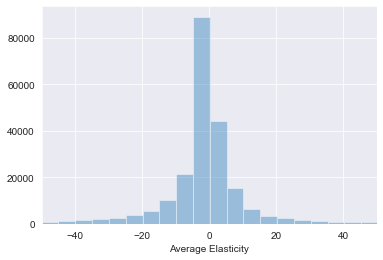

In [175]:
#Let's graph this
sns.set_style('darkgrid')
fig, ax = plt.subplots()

sns.distplot(df_mean['Average Elasticity'], kde = False, bins = 3000, ax = ax)
ax.set_xlim(-50,50)

How may positive elasticity owners do we have?

In [176]:
total = df_mean[df_mean['Average Elasticity'] > 0].count()[0]
print('We have ' + str(total) + ' unique owners with positive elasticities')

We have 83029 unique owners with positive elasticities


In [177]:
#Create combined dataframe of S&B with average elasticities
df_target_list = pd.merge(df_mean, df_filtered_owners, how = 'left', on = 'Owner Key')
df_target_list['Category'] = ''

#Defining different user categories here
df_target_list.loc[df_target_list['is_in_filtering_logic'] != True, 'Category'] = 'Not enough data / Beyond targeting scope'
df_target_list.loc[(df_target_list['is_in_filtering_logic'] == True) & 
                   (df_target_list['Average Elasticity'] < -6.135554), 'Category'] = 'High discount sensitivity'
df_target_list.loc[(df_target_list['is_in_filtering_logic'] == True) & 
                   (df_target_list['Average Elasticity'] >= -6.135554) & 
                   (df_target_list['Average Elasticity'] < -2), 'Category'] = 'Medium discount sensitivity'
df_target_list.loc[(df_target_list['is_in_filtering_logic'] == True) & 
                   (df_target_list['Average Elasticity'] >= -2) & 
                   (df_target_list['Average Elasticity'] < 1.145), 'Category'] = 'Not interested in discounted S&B services'
df_target_list.loc[(df_target_list['is_in_filtering_logic'] == True) & 
                   (df_target_list['Average Elasticity'] >= 1.145), 'Category'] = 'Luxury users'

df_target_list.head()

,Average Elasticity,Owner Key,is_in_filtering_logic,Category
0,-1.389000,100294,True,Not interested in discounted S&B services
1,3.055667,100306,True,Luxury users
2,1.190333,100313,True,Luxury users
3,-0.782667,100358,NaN,Not enough data / Beyond targeting scope
4,-4.815000,100364,True,Medium discount sensitivity


# **Final Output (DO NOT RUN) **

In [181]:
df_target_list = df_target_list.drop(['Average Elasticity', 'is_in_filtering_logic'], axis = 1)
df_target_list.head()

,Owner Key,Category
0,100294,Not interested in discounted S&B services
1,100306,Luxury users
2,100313,Luxury users
3,100358,Not enough data / Beyond targeting scope
4,100364,Medium discount sensitivity


In [182]:
df_target_list.to_csv('SB_Targeting_11_04_clean.csv', index = False)

#                            **********DO NOT UNBLOCK THIS CODE SECTION**********
# VERSION 1.0 OLD LIST DO NOT USE
# df_bottom_25_elasticity = df_mean[df_mean['Average Elasticity'] <= -1.119]
# df_target_list = pd.merge(df_bottom_25_elasticity, df_filtered_owners, on = 'Owner Key')
# df_target_list = pd.DataFrame(df_target_list['Owner Key'])

#df_target_list.to_csv('SB_Targeting_10_30.csv', index = False)
#                            **********DO NOT UNBLOCK THIS CODE SECTION**********

-------------------

### Appendix DO NOT RUN

In [155]:
#Calculating all elasticities here, see draft notebook for original loop if you bump into validation issues here

j = 0
elasticity_list = list()

for i in df['Owner Key'].unique():
    df_iterator = df[df['Owner Key'] == i]
    if df_iterator.count()[0] <= 1:
        continue
    for idx in df_iterator.index:
        if df_iterator.loc[[idx], 'COMPLETED_WALKS'].item() == 0:
            dq = df_iterator.loc[[idx], 'COMPLETED_WALKS'].item() - df_iterator.loc[[idx+1], 'COMPLETED_WALKS'].item()
        else:
            dq = (df_iterator.loc[[idx], 'COMPLETED_WALKS'].item() - df_iterator.loc[[idx+1], 'COMPLETED_WALKS'].item()) / df_iterator.loc[[idx], 'COMPLETED_WALKS'].item()
        if df_iterator.loc[[idx], 'OWNER_PAYOUT'].item() == 0:
            dp = df_iterator.loc[[idx], 'OWNER_PAYOUT'].item() - df_iterator.loc[[idx+1], 'OWNER_PAYOUT'].item()
        else:
            dp = (df_iterator.loc[[idx], 'OWNER_PAYOUT'].item() - df_iterator.loc[[idx+1], 'OWNER_PAYOUT'].item()) / df_iterator.loc[[idx], 'OWNER_PAYOUT'].item()
        elasticity = round(dq/dp,3)
        weight = df_iterator.loc[[idx], 'COMPLETED_WALKS'].item()
        owner_key = df_iterator.loc[[idx], 'Owner Key'].item()
        data = (elasticity, weight, owner_key)
        elasticity_list.append(data)
        j += 1
        if j >= len(df_iterator.index) - 1:
            break
    j = 0

df_new = pd.DataFrame(elasticity_list, columns = ['Elasticity', 'Weight', 'Owner Key'])
df_new.head(40)

,Elasticity,Weight,Owner Key
0,-1.000,6,100294
1,-1.778,9,100294
2,9.167,6,100306
3,-0.000,1,100306
4,0.000,1,100306
...,...,...,...
35,2.118,2,100409
36,0.000,1,100409
37,431.667,1,100409
38,2.300,38,100409


In [156]:
#Calculating average elasticities here

mean_list = list()
for i in df_new['Owner Key'].unique():
    df_iterator = df_new[df_new['Owner Key'] == i]
    mean = df_iterator['Elasticity'].mean()
    data = (mean, i)
    mean_list.append(data)
    

df_mean = pd.DataFrame(mean_list, columns = ['Average Elasticity', 'Owner Key'])
df_mean.head(50)
    

,Average Elasticity,Owner Key
0,-1.389000,100294
1,3.055667,100306
2,1.190333,100313
3,-0.782667,100358
4,-4.815000,100364
...,...,...
45,-2.000000,100849
46,0.016750,100852
47,-5.107250,100871
48,-10.836333,100879


In [157]:
#Version 3.0 with both accurate payouts and elasticity formula
df_new.to_csv('df_new_11_04_run', index = False) #the 10.31 run used old owner payout definition - see later October analyst_team chat
df_mean.to_csv('df_mean_11_04_run', index = False)

# #                            **********DO NOT UNBLOCK THIS CODE SECTION**********
# #VERSION 2.0 with incorrect payout formula
# df_new.to_csv('df_new_10_31_run', index = False) #the 10.31 run used old owner payout definition - see later October analyst_team chat
# df_mean.to_csv('df_mean_10_31_run', index = False)


# #VERSION 1.0 with incorrect elasticity formula
# df_new.to_csv('df_new_10_31_run', index = False) #the 10.30 run has the old elasticity formula incorrectly calculated
# df_mean.to_csv('df_mean_10_31_run', index = False)
# #                            **********DO NOT UNBLOCK THIS CODE SECTION**********